In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt

In [ ]:
image_dir = './image/'

sea_threshold = (0, 128, 255)
forest_threshold = (51, 255, 51)

In [ ]:
def color_features(image):

    # Calculate the mean pixel values for each channel
    mean_r = np.mean(image[:,:,0])
    mean_g = np.mean(image[:,:,1])
    mean_b = np.mean(image[:,:,2])

    return (mean_r, mean_g, mean_b)

In [ ]:
def classify(s_threshold, f_threshold, features):
    (mean_r, mean_g, mean_b) = features
    sea_difference = np.linalg.norm(np.array(s_threshold) - np.array([mean_r, mean_g, mean_b]))
    forest_difference = np.linalg.norm(np.array(forest_threshold) - np.array([mean_r, mean_g, mean_b]))

    if sea_difference < forest_difference:
        return 0
    return 1

In [ ]:
def predict_batch(path):
    x = []
    labels = []  # 0 for sea, 1 for forest
    preds = []

    # Iterate through the images in the dataset
    for f in os.listdir(path):
        # load the image and convert into numpy array
        img = Image.open(path+f)
        img_np = np.asarray(img)
        # extract image features
        img_feature = color_features(img_np)
        pred = classify(sea_threshold, forest_threshold, img_feature)
        label = 0 if f[0] == 's' else 1

        x.append(img_np)
        preds.append(pred)
        labels.append(label)

    return x, labels, preds


In [ ]:
x, y_true, y_pred = predict_batch(image_dir)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("accuracy:", accuracy_score(y_true, y_pred))
print()
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

accuracy: 0.9512195121951219

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.95      0.95      0.95        42

    accuracy                           0.95        82
   macro avg       0.95      0.95      0.95        82
weighted avg       0.95      0.95      0.95        82

[[38  2]
 [ 2 40]]


# Misclassified Examples

[9, 23, 31, 67]


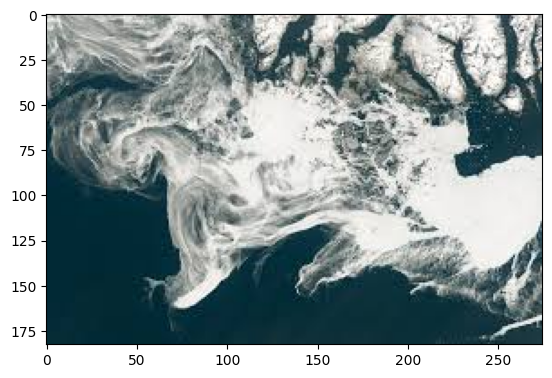

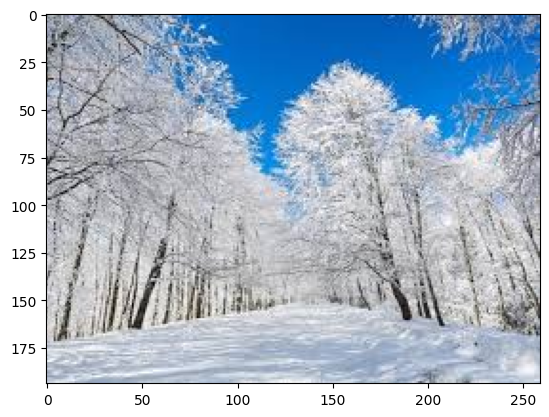

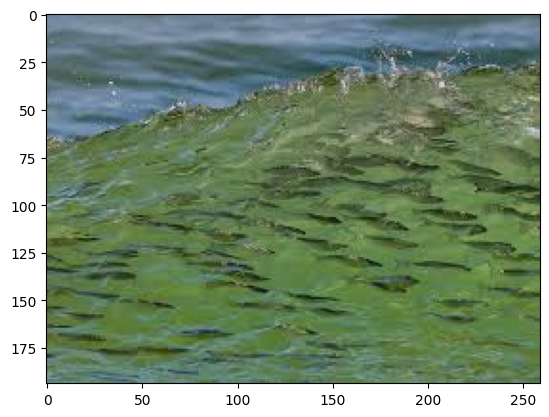

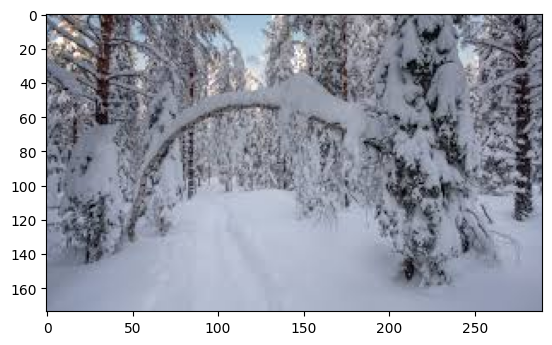

In [ ]:
different_indices = [i for i, (x, y) in enumerate(zip(y_true, y_pred)) if x != y]
print(different_indices)
for i in different_indices:
    plt.figure()
    plt.imshow(x[i])